c:\Users\PC\anaconda3\envs\rag\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\PC\anaconda3\envs\rag\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (886 > 256). Running this sequence through the model will result in indexing errors


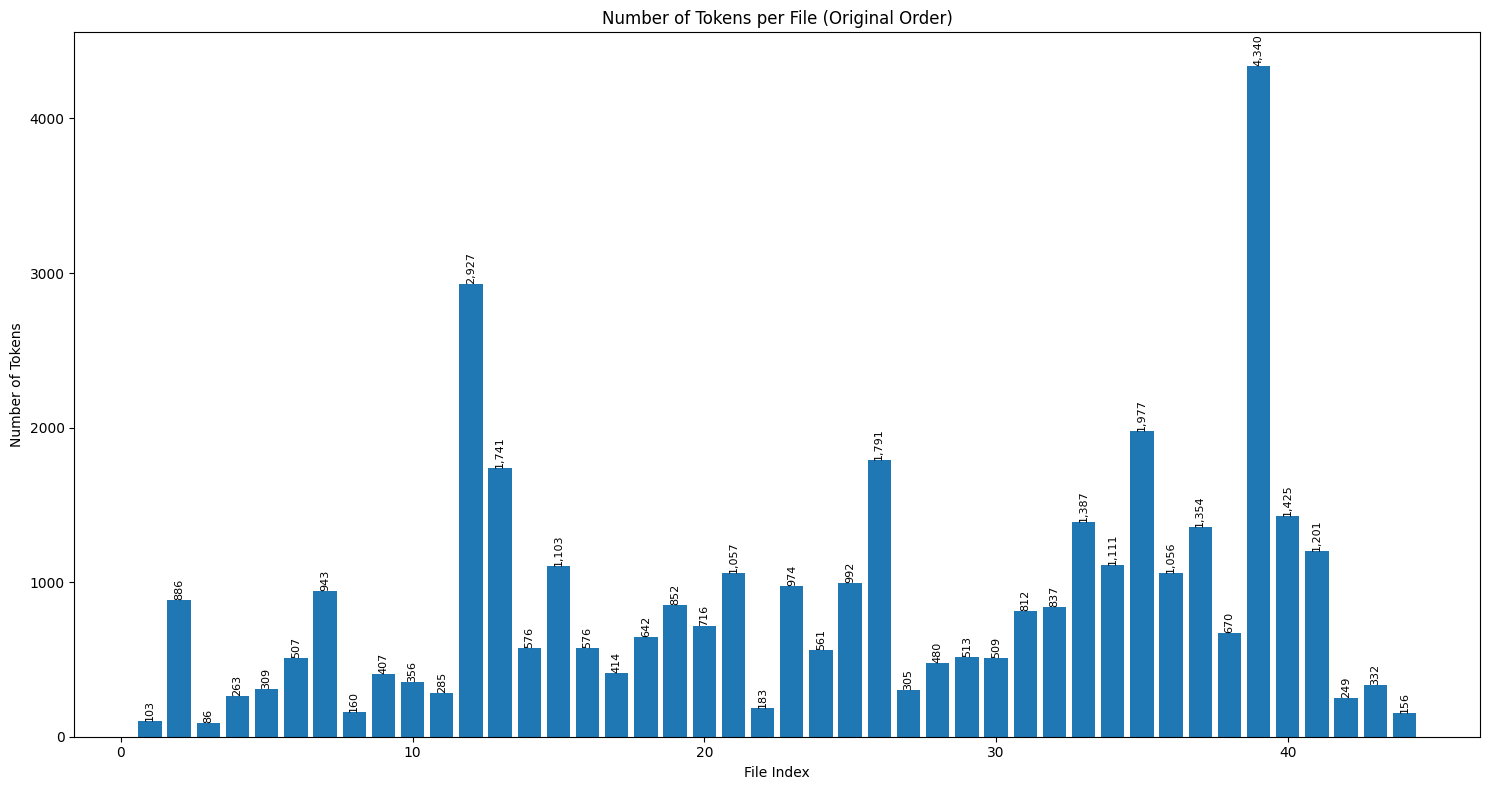

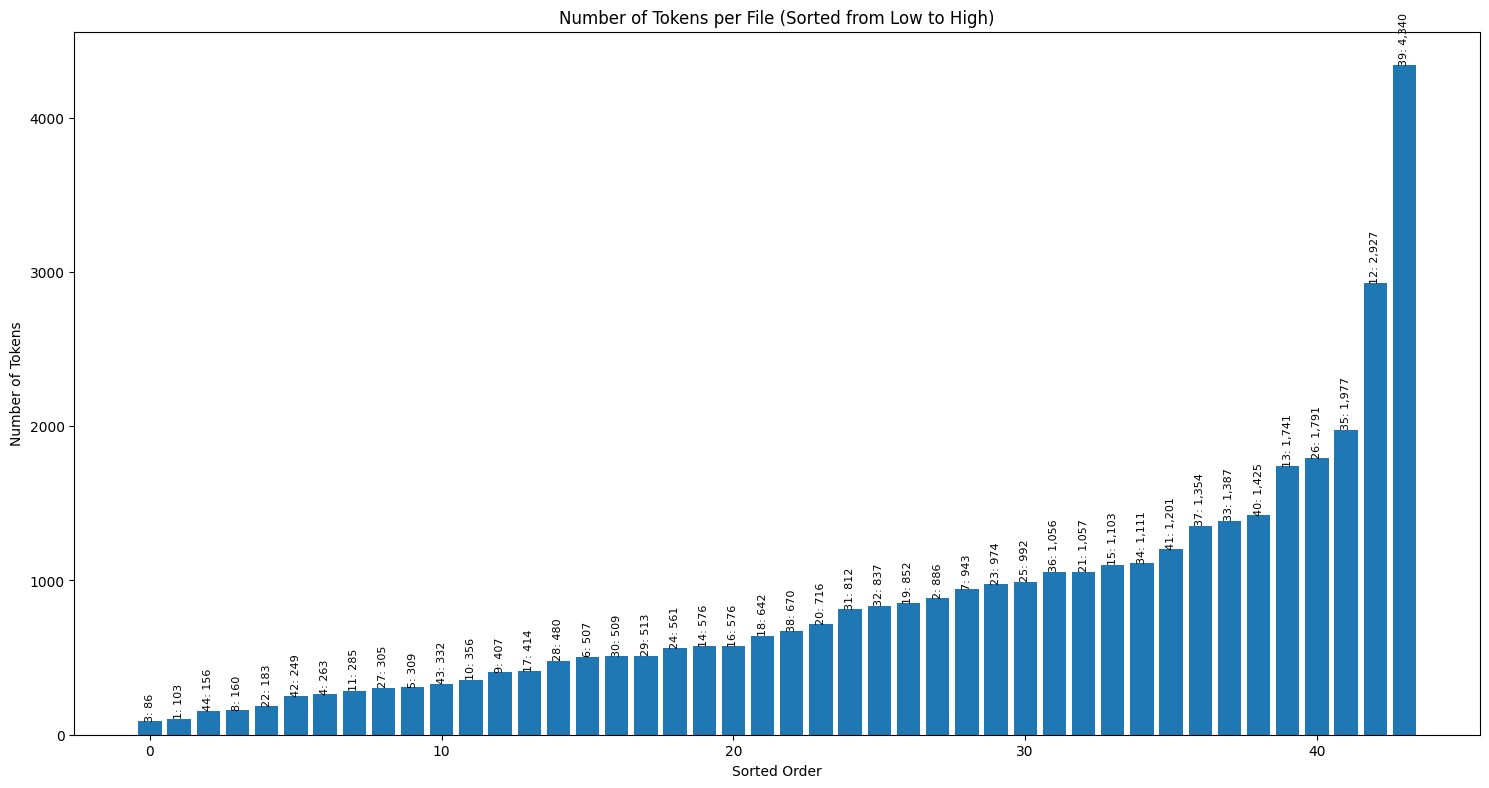

    index                                           filename  num_tokens
0       1                           Ban giám đốc Đại học.txt         103
1       2  Chiến lược phát triển đại học Bách khoa Hà Nội...         886
2       3                          Các giai đoạn lịch sử.txt          86
3       4  Các tổ chức đoàn thể Trường Công nghệ Thông ti...         263
4       5                           Các tổ chức đoàn thể.txt         309
5       6           Câu lạc bộ An toàn thông tin (BKSec).txt         507
6       7                           Câu lạc bộ sinh viên.txt         943
7       8  Cơ cấu tổ chức Trường Công nghệ Thông tin và T...         160
8       9  Cấp giấy tờ cho sinh viên (Giấy giới thiệu, gi...         407
9      10  Cấp giấy tờ cho sinh viên Giấy giới thiệu, giấ...         356
10     11                        Danh hiệu - khen thưởng.txt         285
11     12              Giới thiệu Khoa Khoa học máy tính.txt        2927
12     13              Giới thiệu Khoa Kỹ thuật máy

In [1]:
import os
import glob
import pandas as pd
import tiktoken
from langchain.document_loaders import TextLoader, PyPDFLoader
import matplotlib.pyplot as plt
DATA_PATH = r'D:\DATN\QA_System\data_hust\info'
def load_and_count_tokens(path=DATA_PATH):
    data = []
    
    # Đọc file txt
    txt_files = glob.glob(f'{path}/*.txt')
    for txt in txt_files:
        loader = TextLoader(txt, autodetect_encoding=True)
        content = ' '.join([doc.page_content for doc in loader.load()])
        num_tokens = num_tokens_from_string(content, tokenizer= tokenizer)
        data.append({
            'filename': os.path.basename(txt),
            'file_type': 'txt',
            'num_tokens': num_tokens
        })
    
    # Đọc file pdf
    pdf_files = glob.glob(f'{path}/*.pdf')
    for pdf in pdf_files:
        loader = PyPDFLoader(pdf)
        content = ' '.join([doc.page_content for doc in loader.load()])
        num_tokens = num_tokens_from_string(content, tokenizer= tokenizer)
        data.append({
            'filename': os.path.basename(pdf),
            'file_type': 'pdf',
            'num_tokens': num_tokens
        })
    
    return pd.DataFrame(data)
from transformers import AutoTokenizer
def load_tokenizer(tokenizer_model: str = "keepitreal/vietnamese-sbert"):
    """
    Hàm tải và khởi tạo tokenizer.
    
    Tham số:
    - tokenizer_model: Tên mô hình tokenizer. Mặc định là "keepitreal/vietnamese-sbert".
    
    Trả về: Đối tượng tokenizer.
    """
    return AutoTokenizer.from_pretrained(tokenizer_model)
# Tải tokenizer PhoBERT
tokenizer = load_tokenizer() 
def num_tokens_from_string(string: str, tokenizer) -> int:
    """Returns the number of tokens in a text string using the provided tokenizer."""
    num_tokens = len(tokenizer.encode(string))
    return num_tokens
# def num_tokens_from_string(string: str, encoding_name: str) -> int:
#     """Returns the number of tokens in a text string."""
#     encoding = tiktoken.get_encoding(encoding_name)
#     num_tokens = len(encoding.encode(string))
#     return num_tokens

# Tạo DataFrame
df = load_and_count_tokens()

# Thêm cột index
df['index'] = range(1, len(df) + 1)

# Biểu đồ 1: Hiển thị số token theo thứ tự ban đầu
plt.figure(figsize=(15, 8))
bars = plt.bar(df['index'], df['num_tokens'])
plt.title('Number of Tokens per File (Original Order)')
plt.xlabel('File Index')
plt.ylabel('Number of Tokens')

for i, bar in enumerate(bars):
    token_count = df['num_tokens'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{token_count:,}',
             ha='center', va='bottom',
             rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# Biểu đồ 2: Sắp xếp số token từ thấp đến cao
df_sorted = df.sort_values('num_tokens')
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(df_sorted)), df_sorted['num_tokens'])
plt.title('Number of Tokens per File (Sorted from Low to High)')
plt.xlabel('Sorted Order')
plt.ylabel('Number of Tokens')

for i, bar in enumerate(bars):
    index = df_sorted['index'].iloc[i]
    token_count = df_sorted['num_tokens'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{index}: {token_count:,}',
             ha='center', va='bottom',
             rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# In bảng ánh xạ giữa index và tên file đầy đủ
print(df[['index', 'filename', 'num_tokens']])

# Thống kê theo loại file
print(df.groupby('file_type')['num_tokens'].agg(['mean', 'min', 'max', 'sum']))

In [ ]:
df_sorted.to_csv('new_output.csv', index=False, encoding='utf-8')

In [1]:
import os
import glob
from langchain.document_loaders import TextLoader
from transformers import AutoTokenizer
from langchain.text_splitter import RecursiveCharacterTextSplitter 
# Đọc tất cả các file .txt từ thư mục chính và các thư mục con
base_dir = r"D:\DATN\QA_System\data_hust"
file_paths = glob.glob(os.path.join(base_dir, '**', '*.txt'), recursive=True)
# Đọc tất cả file .txt
#file_paths = glob.glob(r"D:\DATN\QA_System\data_hust\điều, khoản\*.txt")

# Load documents
documents = []
for file_path in file_paths:
    file_name = os.path.basename(file_path)  # Chỉ lấy tên file
    loader = TextLoader(file_path, encoding='utf-8')
    loaded_docs = loader.load()
    # Gắn tên file vào mỗi document
    for doc in loaded_docs:
        doc.metadata['source'] = file_name  # Thêm metadata là tên file
        documents.append(doc)
print("số văn bản đã load là: ")
print(len(documents))
# Hàm tải tokenizer
def load_tokenizer(tokenizer_model: str = "keepitreal/vietnamese-sbert"):
    """
    Hàm tải và khởi tạo tokenizer.
    
    Tham số:
    - tokenizer_model: Tên mô hình tokenizer. Mặc định là "keepitreal/vietnamese-sbert".
    
    Trả về: Đối tượng tokenizer.
    """
    return AutoTokenizer.from_pretrained(tokenizer_model)

# Tải tokenizer PhoBERT
tokenizer = load_tokenizer() 

# Tùy chỉnh separators và token limit
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=256,  # Giới hạn theo token
    chunk_overlap=64,  
    separators=["\n\n", "\n", ". ", " "],  # Tùy chỉnh separators
    length_function=lambda text: len(tokenizer.encode(text, truncation=False, max_length=512))
)
text_splitter1 = RecursiveCharacterTextSplitter(chunk_size=256, chunk_overlap=64)


# Chia nhỏ tài liệu
chunks = text_splitter.split_documents(documents)
chunks1 = text_splitter1.split_documents(documents)

# In số lượng chunks
print(f"Tổng số chunks theo token: {len(chunks)}")
print(f"Tổng số chunks theo ký tự: {len(chunks1)}")

print(f"Độ dài (ký tự): {len(chunks1[0].page_content)}")
print(f"Độ dài (token): {len(tokenizer.encode(chunks[0].page_content))}")




c:\Users\PC\anaconda3\envs\rag\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


số văn bản đã load là: 
75


c:\Users\PC\anaconda3\envs\rag\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Tổng số chunks theo token: 682
Tổng số chunks theo ký tự: 2391
Độ dài (ký tự): 133
Độ dài (token): 235


In [2]:
from uuid import uuid4
import pandas as pd
from langchain_core.documents import Document
import os
def load_final_df():
    final_df_path = r"D:\DATN\QA_System\data_analyze\finaldf.xlsx"
    if os.path.exists(final_df_path):
        final_df = pd.read_excel(final_df_path)
        print(f"Đã load final_df từ file: {final_df_path}")
        return final_df
    else:
        print("File final_df chưa tồn tại.")
        return None
def convert_df_to_documents(final_df):
    documents = []
    for _, row in final_df.iterrows():
        # Handle metadata - convert to dict if it's a string
        metadata = row["metadata"]
        if isinstance(metadata, str):
            source = metadata
        else:
            source = metadata.get("source", "unknown") if isinstance(metadata, dict) else "unknown"

        # Create Document with properly handled metadata
        doc = Document(
            page_content=row["text"],
            metadata={
                "source": source,
                "level": row["level"]
            }
        )
        documents.append(doc)

    # Process documents
    processed_documents = []
    for doc in documents:
        # Handle source field
        if isinstance(doc.metadata["source"], list):
            doc.metadata["source"] = " ".join(doc.metadata["source"]) if doc.metadata["source"] else "..."
        elif doc.metadata["source"] is None:
            doc.metadata["source"] = "..."

        # Skip empty content
        if not doc.page_content.strip():
            print(f"Warning: Page content is empty for document: {doc.metadata['source']}")
            continue

        processed_documents.append(doc)

    print(f"Processed {len(processed_documents)} out of {len(documents)} documents.")
    return processed_documents

final_df = load_final_df()
chunks = convert_df_to_documents(final_df)

Đã load final_df từ file: D:\DATN\QA_System\data_analyze\finaldf.xlsx
Processed 1198 out of 1198 documents.


In [3]:
chunks

[Document(metadata={'source': "{'source': 'Ban giám đốc Đại học.txt', 'id': '0'}", 'level': 0}, page_content='Giám đốc Đại học:\xa0PGS.TS. Huỳnh Quyết Thắng\nEmail: thang.huynhquyet@hust.edu.vn\xa0\nPhó Giám đốc:\xa0PGS.TS. Nguyễn Phong Điền\nEmail: dien.nguyenphong@hust.edu.vn\xa0\nPhó Giám đốc: PGS.TS. Huỳnh Đăng Chính\nEmail: chinh.huynhdang@hust.edu.vn\xa0\nPhó Giám đốc: PGS.TS. Trần Ngọc Khiêm\nEmail: khiem.tranngoc@hust.edu.vn'),
 Document(metadata={'source': "{'id': ['0'], 'source': ['Ban giám đốc Đại học.txt']}", 'level': 1}, page_content='Cụm văn bản này cung cấp thông tin liên hệ của các lãnh đạo cấp cao của Đại học Bách Khoa Hà Nội, bao gồm Giám đốc và ba Phó Giám đốc.  Cụ thể,  đó là tên, chức danh và địa chỉ email của PGS.TS. Huỳnh Quyết Thắng (Giám đốc), PGS.TS. Nguyễn Phong Điền, PGS.TS. Huỳnh Đăng Chính và PGS.TS. Trần Ngọc Khiêm (ba Phó Giám đốc).\n'),
 Document(metadata={'source': "{'source': 'Chiến lược phát triển đại học Bách khoa Hà Nội.txt', 'id': '0'}", 'level': 

Token indices sequence length is longer than the specified maximum sequence length for this model (500 > 256). Running this sequence through the model will result in indexing errors


Độ dài các chunk (theo token): [103, 86, 154, 148, 118, 176, 180, 159, 127, 500, 140, 96, 120, 78, 134, 156, 156, 174, 141, 94, 179, 57, 180, 148, 178, 165, 170, 145, 149, 167, 211, 282, 243, 84, 83, 148, 166, 56, 226, 148, 150, 104, 330, 178, 140, 168, 106, 316, 159, 168, 155, 157, 154, 155, 162, 143, 79, 525, 159, 170, 173, 186, 103, 297, 123, 184, 102, 307, 154, 177, 40, 156, 96, 174, 161, 89, 23, 44, 45, 44, 51, 54, 51, 44, 13, 181, 161, 163, 127, 175, 127, 161, 178, 157, 139, 176, 142, 157, 163, 175, 117, 179, 363, 513, 511, 398, 476, 507, 91, 185, 150, 126, 158, 87, 147, 107, 179, 170, 166, 179, 96, 156, 467, 345, 273, 288, 503, 142, 168, 157, 161, 126, 299, 166, 155, 151, 164, 159, 174, 175, 165, 63, 516, 149, 170, 175, 157, 144, 119, 176, 99, 155, 173, 167, 381, 143, 147, 127, 145, 147, 287, 161, 156, 160, 156, 109, 278, 160, 132, 157, 139, 177, 167, 145, 158, 163, 156, 114, 162, 155, 152, 173, 175, 157, 172, 122, 175, 161, 121, 135, 176, 74, 346, 332, 207, 319, 173, 159, 168, 

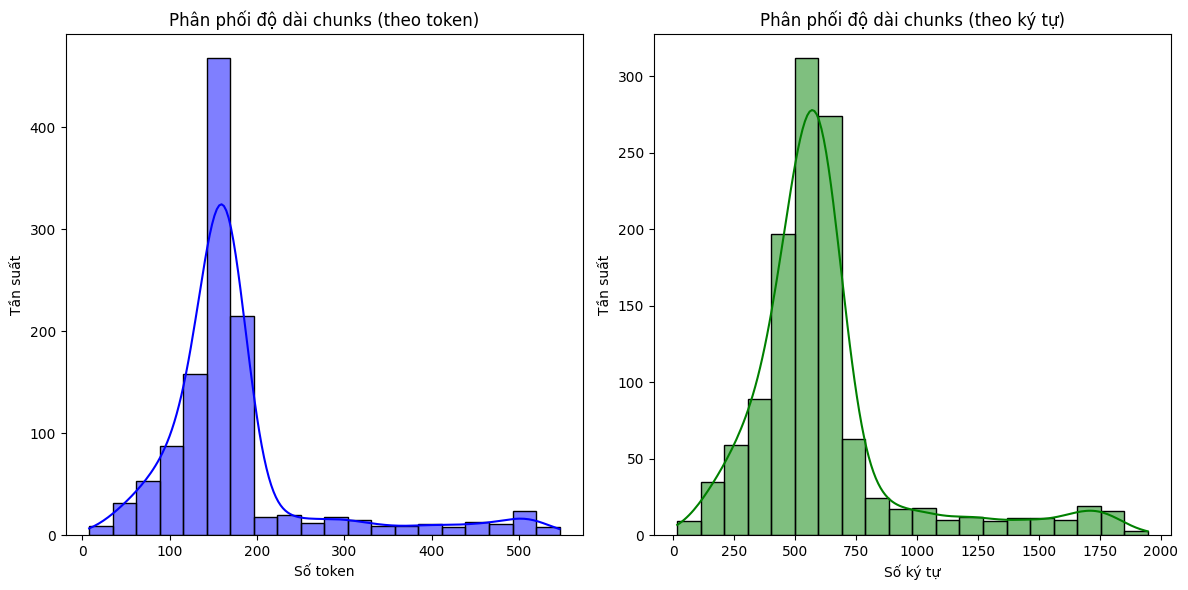

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
def load_tokenizer(tokenizer_model: str = "keepitreal/vietnamese-sbert"):
    """
    Hàm tải và khởi tạo tokenizer.
    
    Tham số:
    - tokenizer_model: Tên mô hình tokenizer. Mặc định là "keepitreal/vietnamese-sbert".
    
    Trả về: Đối tượng tokenizer.
    """
    return AutoTokenizer.from_pretrained(tokenizer_model)

# Tải tokenizer PhoBERT
tokenizer = load_tokenizer() 
# Tính độ dài các chunk
chunk_lengths_token = [len(tokenizer.encode(chunk.page_content)) for chunk in chunks]

chunk_lengths_char = [len(chunk.page_content) for chunk in chunks]

# In danh sách độ dài
print("Độ dài các chunk (theo token):", chunk_lengths_token)
print("Độ dài các chunk (theo ký tự):", chunk_lengths_char)

# Tính số liệu thống kê
print(f"Thống kê độ dài (theo token): Min={min(chunk_lengths_token)}, Max={max(chunk_lengths_token)}, Trung bình={sum(chunk_lengths_token)/len(chunk_lengths_token):.2f}")
print(f"Thống kê độ dài (theo ký tự): Min={min(chunk_lengths_char)}, Max={max(chunk_lengths_char)}, Trung bình={sum(chunk_lengths_char)/len(chunk_lengths_char):.2f}")

# Trực quan hóa bằng biểu đồ
plt.figure(figsize=(12, 6))

# Histogram cho token
plt.subplot(1, 2, 1)
sns.histplot(chunk_lengths_token, bins=20, kde=True, color='blue')
plt.title("Phân phối độ dài chunks (theo token)")
plt.xlabel("Số token")
plt.ylabel("Tần suất")

# Histogram cho ký tự
plt.subplot(1, 2, 2)
sns.histplot(chunk_lengths_char, bins=20, kde=True, color='green')
plt.title("Phân phối độ dài chunks (theo ký tự)")
plt.xlabel("Số ký tự")
plt.ylabel("Tần suất")

plt.tight_layout()
plt.show()




In [8]:
documents

[Document(metadata={'source': 'phu_luc_khung_danh_gia.md', 'stt': ' **I** '}, page_content='Tiêu chí:  **Tiêu chí điểm cộng (Tối đa 100 điểm)** \nMinh chứng:  \nĐiểm:  '),
 Document(metadata={'source': 'phu_luc_khung_danh_gia.md', 'stt': ' **TC1** '}, page_content='Tiêu chí:  **Điểm học tập (Tối đa 30 điểm)** \nMinh chứng:  \nĐiểm:  30 '),
 Document(metadata={'source': 'phu_luc_khung_danh_gia.md', 'stt': ' 1 '}, page_content='Tiêu chí:  Kết quả học tập có điểm trung bình học kỳ (tối đa 24 điểm): \nMinh chứng:  \nĐiểm:  '),
 Document(metadata={'source': 'phu_luc_khung_danh_gia.md', 'stt': ' '}, page_content='Tiêu chí:  Có kết quả học tập ở mức GPA ≥ 3.6 \nMinh chứng:  * \nĐiểm:  20 '),
 Document(metadata={'source': 'phu_luc_khung_danh_gia.md', 'stt': ' '}, page_content='Tiêu chí:  Có kết quả học tập ở mức: 3.2 ≤ GPA < 3.6 \nMinh chứng:  * \nĐiểm:  18 '),
 Document(metadata={'source': 'phu_luc_khung_danh_gia.md', 'stt': ' '}, page_content='Tiêu chí:  Có kết quả học tập ở mức: 2.5 ≤ GPA <

In [11]:
# Đọc tệp văn bản
file_path = r"D:\DATN\QA_System\data_hust\table\Hướng dẫn làm Thẻ gửi xe trong Trường và làm vé xe buýt tháng.txt"
with open(file_path, "r", encoding="utf-8") as f:
    file_content = f.read()

# Tách nội dung văn bản và bảng
sections = file_content.split("\n")  # Giả định chia đoạn bằng dòng trống
text_sections = [section for section in sections if "|" not in section]  # Lọc phần không phải bảng
tables = [section for section in sections if "|" in section]  # Lọc bảng


In [12]:
import pandas as pd
import io

# Chuyển đổi các bảng sang DataFrame
dataframes = []
for table in tables:
    markdown_io = io.StringIO(table)
    df = pd.read_csv(markdown_io, sep="|").dropna(axis=1, how="all")
    df.columns = [col.strip() for col in df.columns]  # Làm sạch tên cột
    df = df.iloc[1:].reset_index(drop=True)  # Loại bỏ hàng không cần thiết
    dataframes.append(df)

# In thử DataFrame đầu tiên
print(dataframes[0])


Empty DataFrame
Columns: []
Index: []


In [13]:
from langchain.schema import Document

# Tạo Document từ các đoạn văn bản
text_documents = [
    Document(page_content=section, metadata={"source": "Hướng dẫn làm Thẻ gửi xe"})
    for section in text_sections
]
table_documents = []
for df in dataframes:
    for _, row in df.iterrows():
        content = " | ".join([f"{col}: {val}" for col, val in row.items()])
        table_documents.append(Document(page_content=content, metadata={"source": "Hướng dẫn làm Thẻ gửi xe"}))
